## Correspondencia de Características (Match)

In [1]:
import numpy as np
import cv2 as cv
import supervision as sv

In [2]:
# Cargamos la imagen a buscar
img1 = cv.imread('template/pattern_cropped_swapped.png', cv.IMREAD_GRAYSCALE)
img11 = cv.imread('template/pattern_cropped.png', cv.IMREAD_GRAYSCALE)

# Cargamos la imagen de búsqueda
img2 = cv.imread('images/coca_retro_2.png', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('images/coca_logo_1.png', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('images/coca_logo_2.png', cv.IMREAD_GRAYSCALE)
img5 = cv.imread('images/coca_retro_1.png', cv.IMREAD_GRAYSCALE)
img6 = cv.imread('images/logo_1.png', cv.IMREAD_GRAYSCALE)
img7 = cv.imread('images/COCA-COLA-LOGO.jpg', cv.IMREAD_GRAYSCALE)

#### 2. Generamos las características con SIFT

In [3]:
# Creamos el vector de características SIFT
sift = cv.SIFT_create()

# Y buscamos según el algoritmo...
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)
kp4, des4 = sift.detectAndCompute(img4,None)
kp5, des5 = sift.detectAndCompute(img5,None)
kp6, des6 = sift.detectAndCompute(img6,None)
kp7, des7 = sift.detectAndCompute(img7,None)
kp11, des11 = sift.detectAndCompute(img11,None)

print(len(kp1))
print(len(kp2))
print(len(kp3))
print(len(kp4))
print(len(kp5))
print(len(kp6))
print(len(kp7))
print(len(kp11))

239
1238
289
615
3892
463
2848
125


#### 2.3 Coincidimos con FLANN + Homografía

In [4]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.70*n.distance:
        good.append(m)
print(len(good))

16


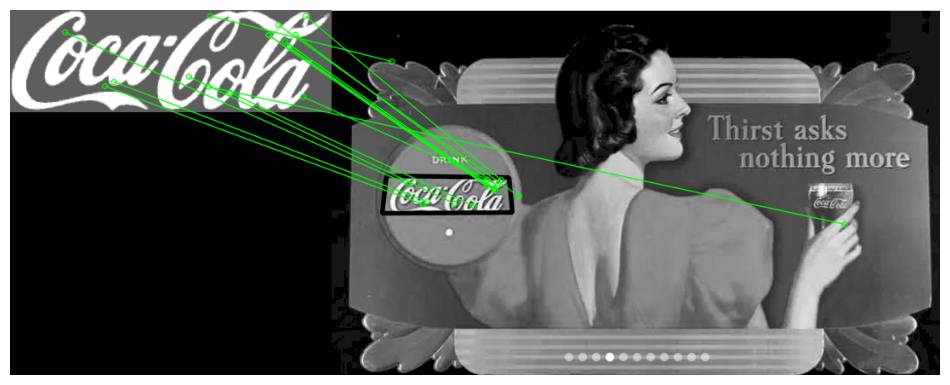

In [5]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img1.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img2_box = img2.copy()
    cv.polylines(img2_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img1, kp1, img2_box, kp2, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img1, kp1, img2, kp2, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)


In [6]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des3,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.70*n.distance:
        good.append(m)
print(len(good))

20


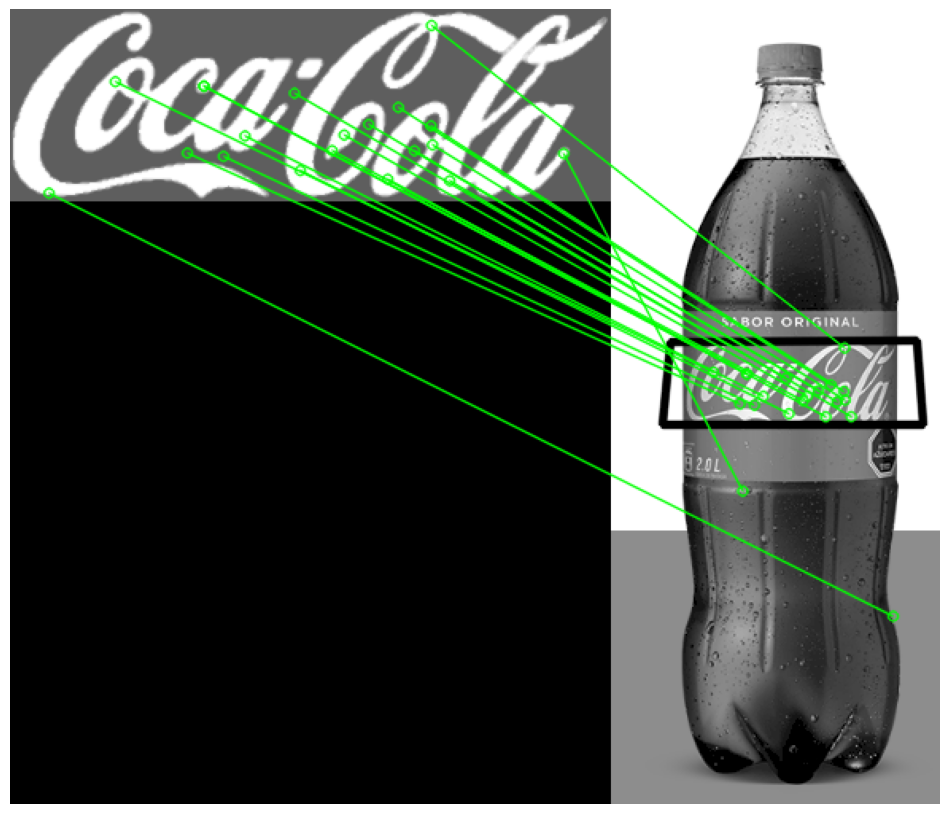

In [7]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp3[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img1.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img3_box = img3.copy()
    cv.polylines(img3_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img1, kp1, img3_box, kp3, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img1, kp1, img3, kp3, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)

In [8]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des4,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.70*n.distance:
        good.append(m)
print(len(good))

24


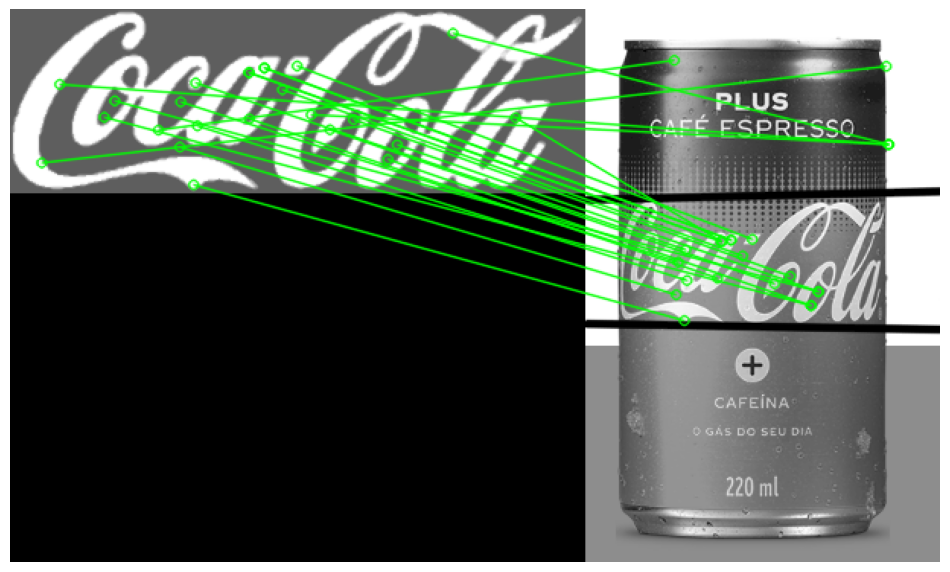

In [9]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp4[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img1.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img4_box = img4.copy()
    cv.polylines(img4_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img1, kp1, img4_box, kp4, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img1, kp1, img4, kp4, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)

In [10]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des11,des5,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.73*n.distance:
        good.append(m)
print(len(good))

23


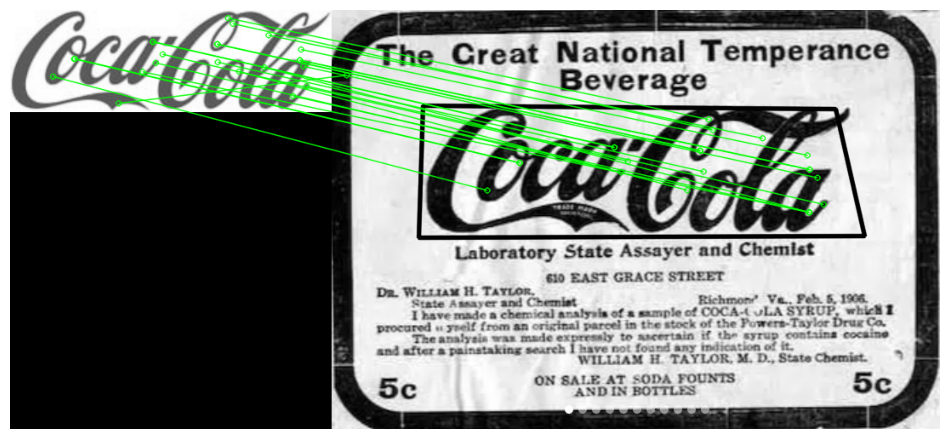

In [11]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp11[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp5[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img11.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img5_box = img5.copy()
    cv.polylines(img5_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img11, kp11, img5_box, kp5, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img11, kp11, img5, kp5, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)

In [12]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des6,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.70*n.distance:
        good.append(m)
print(len(good))

37


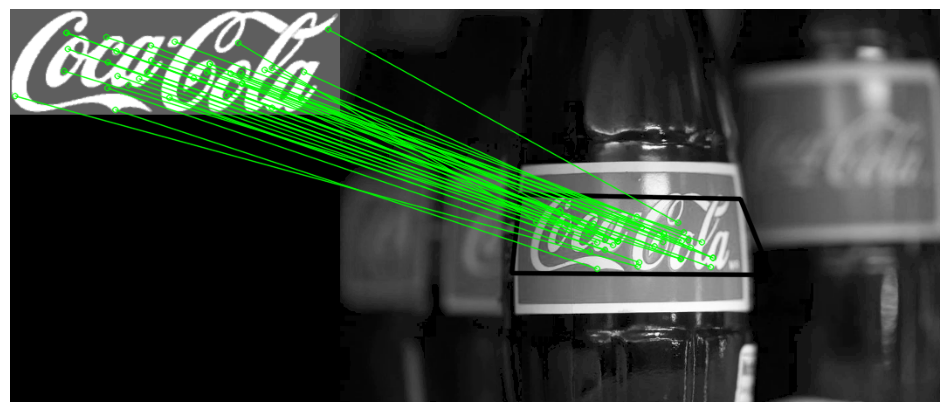

In [13]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp6[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img1.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img6_box = img6.copy()
    cv.polylines(img6_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img1, kp1, img6_box, kp6, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img1, kp1, img6, kp6, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)

In [14]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 500)
search_params = dict(checks = 500)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des7,k=2)

# Guardar todos las buenas coincidencias según la verificación de Ratio de Lowe
good = []
for m,n in matches:
    if m.distance < 0.70*n.distance:
        good.append(m)
print(len(good))

38


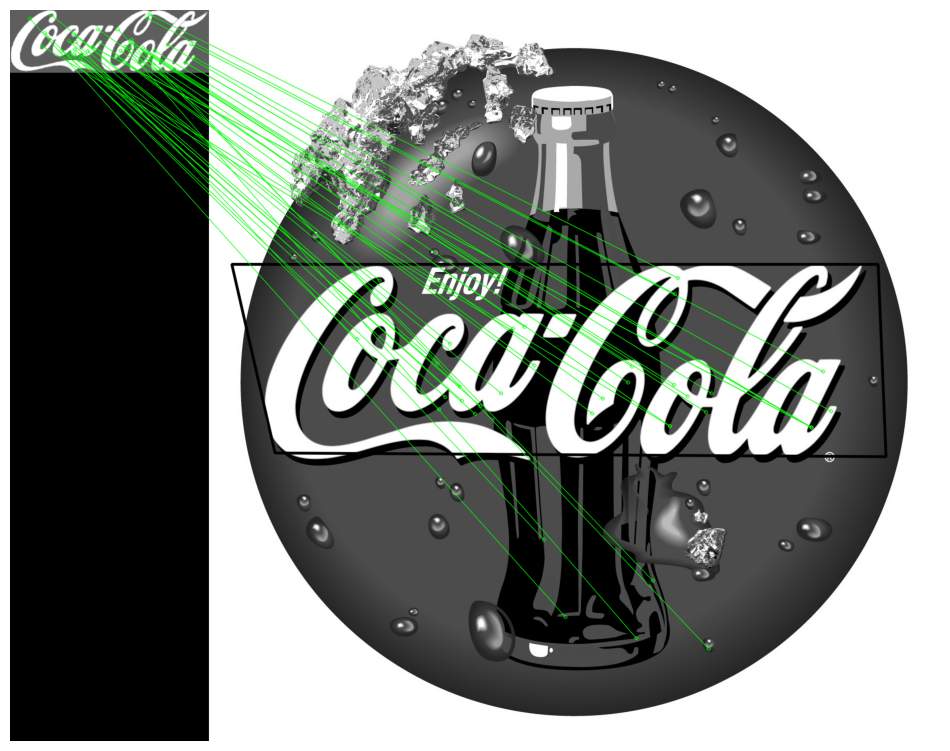

In [15]:
# 1) Extraer coordenadas
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp7[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# 2) Homografía (RANSAC)
H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
if H is not None:
    h, w = img1.shape[:2]  
    corners = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]]).reshape(-1,1,2)
    proj = cv.perspectiveTransform(corners, H) 

    # 3) Dibujar "box" y matches
    img7_box = img7.copy()
    cv.polylines(img7_box, [np.int32(proj)], isClosed=True, color=(0,255,0), thickness=3, lineType=cv.LINE_AA)

    imgr = cv.drawMatches(img1, kp1, img7_box, kp7, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    imgr = cv.drawMatches(img1, kp1, img7, kp7, good, None,
                          matchColor=(0,255,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

sv.plot_image(imgr)